In [1]:
#网络结构如下：
#输入层：输入特征维度为 2

#隐藏层：2个神经元，激活函数为 Tanh

#输出层：2个神经元，激活函数为 Softmax（用于多分类，输出为概率）

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#计算tanh函数
def tanh(a):
  return np.tanh(a)

In [4]:
#计算softmax函数
def softmax(a):
  a_max = np.max(a, axis=1, keepdims=True)
  z = np.exp(a- a_max)

  sums = np.sum(z, axis=1, keepdims=True)

  return z / sums

In [5]:
#计算前向传播,求y_pred
def forward(W1, W2, b1, b2, X):
  Z = np.dot(X, W1.T) + b1 #ndarray (2,2)
  H = tanh(Z) #ndarray (2,2)

  Zout = np.dot(H, W2.T) + b2 #ndarray (2,2)
  y_pred = softmax(Zout)  #ndarray (2,2)
  return Z, H, y_pred

In [6]:
#求损失函数loss
def compute_loss(y_true, y_pred):
  loss = -np.sum(y_true * np.log(y_pred + 1e-10)) / y_pred.shape[0]
  return loss

In [7]:
#反向传播,计算梯度
def backward(y_pred, y_true, H, W2, X):
  dzout = y_pred - y_true #ndarray (2,2)
  b2_grad = np.mean(dzout, axis=0, keepdims=True).T #ndarray (2,1)
  w2_grad = np.dot(dzout.T, H) #ndarray (2,2)

  dh = np.dot(dzout, W2) #shape (2,2)
  dz = dh * (1 - H**2)
  b1_grad = np.mean(dz, axis=0, keepdims=True).T
  W1_grad = np.dot(dz.T, X)
  return W1_grad, w2_grad, b1_grad, b2_grad

In [10]:
#更新参数.weight/bias
def update_params(W1, W2, b1, b2, W1_grad, W2_grad, b1_grad, b2_grad, learning_rate):
  W1 -= learning_rate * W1_grad
  W2 -= learning_rate * W2_grad
  b1 -= learning_rate * b1_grad
  b2 -= learning_rate * b2_grad
  return W1, W2, b1, b2

Epochs: 1 loss 0.6766 W1_grad [ 0.04 -0.03  0.04 -0.03] W2_grad [ 0.07  0.07 -0.07 -0.07] b1_grad [0.01 0.01] b2_grad [-0.03  0.03]
Epochs: 11 loss 0.6605 W1_grad [ 0.08 -0.05  0.07 -0.04] W2_grad [ 0.08  0.07 -0.08 -0.07] b1_grad [0.03 0.03] b2_grad [-0.05  0.05]
Epochs: 21 loss 0.6307 W1_grad [ 0.12 -0.07  0.11 -0.06] W2_grad [ 0.1   0.09 -0.1  -0.09] b1_grad [0.05 0.05] b2_grad [-0.07  0.07]
Epochs: 31 loss 0.5707 W1_grad [ 0.17 -0.09  0.16 -0.07] W2_grad [ 0.15  0.13 -0.15 -0.13] b1_grad [0.08 0.07] b2_grad [-0.07  0.07]
Epochs: 41 loss 0.4666 W1_grad [ 0.2  -0.12  0.18 -0.1 ] W2_grad [ 0.19  0.17 -0.19 -0.17] b1_grad [0.08 0.08] b2_grad [-0.06  0.06]
Epochs: 51 loss 0.342 W1_grad [ 0.18 -0.15  0.17 -0.12] W2_grad [ 0.19  0.17 -0.19 -0.17] b1_grad [0.05 0.06] b2_grad [-0.03  0.03]
Epochs: 61 loss 0.2374 W1_grad [ 0.15 -0.14  0.14 -0.12] W2_grad [ 0.16  0.15 -0.16 -0.15] b1_grad [0.03 0.03] b2_grad [-0.02  0.02]
Epochs: 71 loss 0.1653 W1_grad [ 0.12 -0.12  0.11 -0.1 ] W2_grad [ 0.13

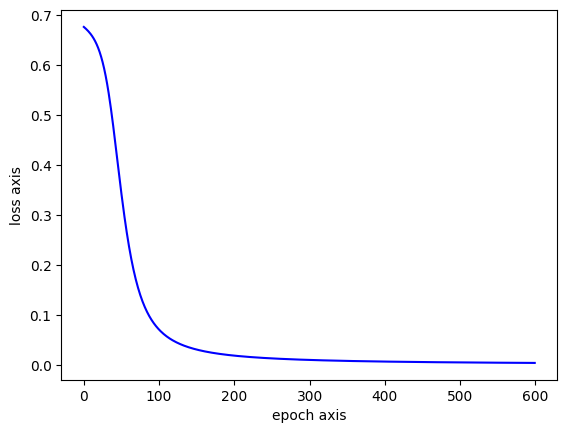

In [13]:
X = np.array([[0.5, 0.2],
        [0.1, 0.7]]) # shape (2,2)

# 标签（one-hot）
y_true = np.array([[1, 0],
          [0, 1]])  # shape (2,2)

# 权重和偏置初始化
W1 = np.array([[0.1, 0.3],
        [0.2, 0.4]])  # shape (2, 2)

b1 = np.array([[0.1],
        [0.2]])     # shape (2, 1)

W2 = np.array([[0.5, 0.6],
        [0.7, 0.8]])  # shape (2, 2)

b2 = np.array([[0.1],
        [0.2]])     # shape (2, 1)

learning_rate = 0.1

epochs = 600
losses = []

for epoch in range(epochs):
  Z, H, y_pred = forward(W1, W2, b1, b2, X)
  loss = compute_loss(y_true, y_pred)
  losses.append(loss)

  W1_grad, W2_grad, b1_grad, b2_grad = backward(y_pred, y_true, H, W2, X)
  loss = compute_loss(y_true, y_pred)
  W1, W2, b1, b2 = update_params(W1, W2, b1, b2, W1_grad, W2_grad, b1_grad, b2_grad, learning_rate)

  if epoch%10== 0:
    print("Epochs:", epoch + 1,
        "loss", np.round(loss, 4),
        "W1_grad", np.round(W1_grad.flatten(), 2),
        "W2_grad", np.round(W2_grad.flatten(), 2),
        "b1_grad", np.round(b1_grad.flatten(), 2),
        "b2_grad", np.round(b2_grad.flatten(), 2)
        )

plt.plot(range(epochs), losses, "blue")
plt.xlabel("epoch axis")
plt.ylabel("loss axis")
plt.show()